[*********************100%***********************]  1 of 1 completed


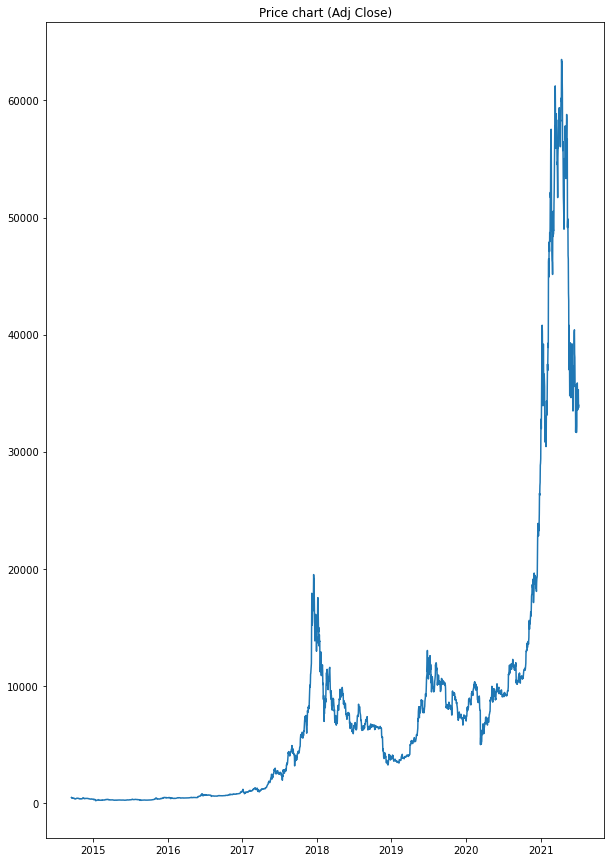

In [43]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import yfinance as yf
import math as mt
import sys
from shapely.geometry import LineString
ticker_df = yf.download(tickers= 'BTC-USD', period = 'max', interval='1d')
#ticker_df.columns
#ticker_df.info()
ticker_df = ticker_df.reset_index()
df = ticker_df

plt.figure(figsize=(10,15))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close)')
plt.show()


In [3]:
print (df['Adj Close'])

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2476    33897.046875
2477    34668.546875
2478    35287.781250
2479    33746.003906
2480    33940.406250
Name: Adj Close, Length: 2481, dtype: float64


In [4]:
ema10 = df['Adj Close'].ewm(span=50).mean()
ema20 = df['Adj Close'].ewm(span=200).mean()

In [5]:
pd.set_option('display.max_columns', None)
df1=pd.DataFrame()

df1['50sma'] = df['Adj Close'].rolling(window=50).mean()
df1['200sma'] = df['Adj Close'].rolling(window=200).mean()
df1['Date'] = df['Date']

In [6]:
print (df1['50sma'])
print (df1['200sma'])
print (df1['Date'])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2476    37158.572266
2477    36854.332500
2478    36624.884375
2479    36370.683281
2480    36178.741172
Name: 50sma, Length: 2481, dtype: float64
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2476    43966.679814
2477    44042.937168
2478    44112.823086
2479    44167.527295
2480    44221.539521
Name: 200sma, Length: 2481, dtype: float64
0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2476   2021-07-02
2477   2021-07-03
2478   2021-07-04
2479   2021-07-05
2480   2021-07-06
Name: Date, Length: 2481, dtype: datetime64[ns]


In [7]:
for i in range(200, df1['50sma'].size):
    
    if(mt.floor(df1['50sma'][i])== mt.floor(df1['200sma'][i])):
        print(df1['50sma'][i])

250.18193817138672
247.78294036865233
8387.233125


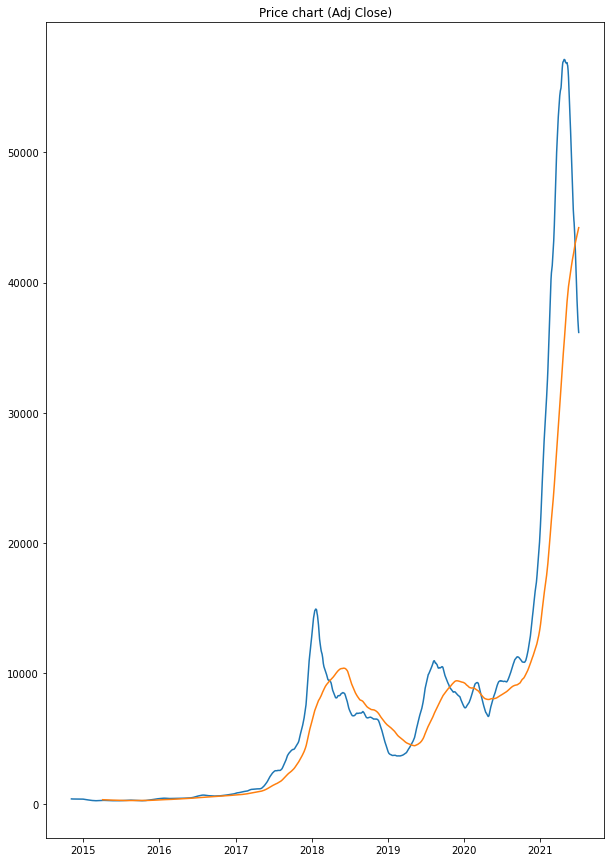

In [8]:
plt.figure(figsize=(10,15))
plt.plot(df1['Date'], df1['50sma'])
plt.plot(df1['Date'], df1['200sma'])

plt.title('Price chart (Adj Close)')
plt.show()

[  259.63990112   260.05324127   260.43998108   260.46822113
   260.61522095   260.53100098   260.38646088   260.21884094
   259.99104095   259.59638092   259.29834076   259.1204007
   258.84952087   258.24008087   257.60682098   256.89530121
   256.08728088   255.13676086   254.40416077   253.50596069
   252.57930084   251.44268097   250.5413208    249.26628082
   247.9472406    246.74256073   245.49706055   244.48892029
   243.65838013   242.71088013   241.62144043   240.50698029
   240.12768005   239.78638      239.38804016   238.99346039
   238.47742065   237.96486084   237.78050079   237.59514069
   237.37660065   237.15908051   236.83916046   236.64746063
   236.33588074   236.13176086   235.89320068   235.64006073
   235.33106049   235.07618042   234.60642059   234.23890045
   233.92096069   233.76868073   233.63708069   233.58254059
   233.4553006    233.1907605    233.21508026   233.34938019
   233.35920044   233.2867804    233.34152039   233.33202026
   233.44980011   233.538

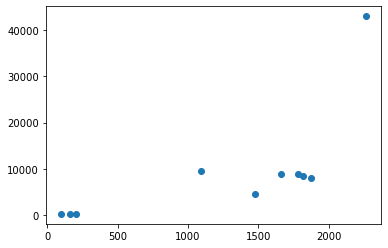

In [44]:
sma1=np.array(df1['50sma'])[200:]
sma2=np.array(df1['200sma'])[200:]
#datedata=np.array(df1['Date'])[200:]
np.set_printoptions(threshold=sys.maxsize)
print(sma1)
print(sma2)
#print(datedata)


datedata=np.array(range(sma1.size))

line_1= LineString(np.column_stack((datedata, sma1)))
line_2= LineString(np.column_stack((datedata, sma2)))
intersection = line_1.intersection(line_2)
if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')

In [35]:
x, y = LineString(intersection).xy

In [37]:
print (x) 
print (y)

array('d', [99.91598707107126, 161.62176330881985, 205.77383446901206, 1089.7118230035273, 1479.142674642783, 1664.5572949468256, 1780.139892847872, 1815.0056796274066, 1871.7312004655532, 2262.7422131792086])
array('d', [247.94945111650028, 250.6512694435999, 247.50696858823187, 9456.933326478293, 4527.940753100071, 8935.800815351546, 8890.167495064152, 8386.94915500002, 8077.075714500861, 42974.39387509128])
